#Predicting Heart Disease



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,N,0.0,Flat,1


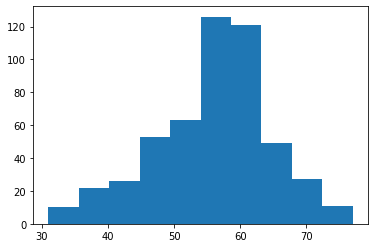

In [3]:
HeartDisease_perageinterval = list(df['Age'][df['HeartDisease']==1])

plt.hist(HeartDisease_perageinterval)
plt.show()

In [4]:
male_count = len(df['Sex'][df['Sex']=='M'])
female_count = len(df['Sex'][df['Sex']=='F'])

label = ['Male', "Female"]
count = [male_count, female_count]

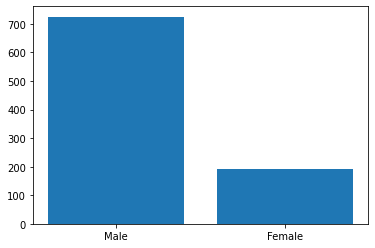

In [5]:
plt.bar(label, count)
plt.show()

In [6]:
asy_chest_pain = df[df['HeartDisease']==1]
asy_chest_pain = asy_chest_pain[asy_chest_pain['ChestPainType']=='ASY']

ata_chest_pain = df[df['HeartDisease']==1]
ata_chest_pain = ata_chest_pain[ata_chest_pain['ChestPainType']=='ATA']

nap_chest_pain = df[df['HeartDisease']==1]
nap_chest_pain = nap_chest_pain[nap_chest_pain['ChestPainType']=='NAP']

ta_chest_pain = df[df['HeartDisease']==1]
ta_chest_pain = ta_chest_pain[ta_chest_pain['ChestPainType']=='TA']

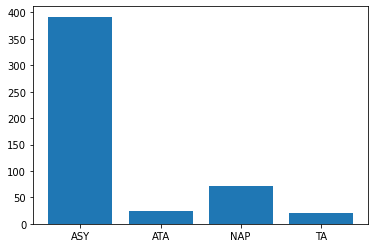

In [7]:
label = ['ASY', 'ATA', 'NAP', 'TA']
count = [len(asy_chest_pain), len(ata_chest_pain), len(nap_chest_pain), len(ta_chest_pain)]

plt.bar(label, count)
plt.show()

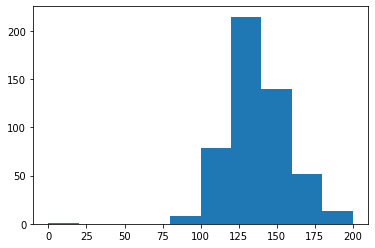

In [8]:
resting_blood_pressure = list(df['RestingBP'][df['HeartDisease']==1])

plt.hist(resting_blood_pressure)
plt.show()

In [10]:
ECG = df[df['HeartDisease']==1]
lvh_ecg = ECG[ECG['RestingECG']=='LVH']
st_ecg = ECG[ECG['RestingECG']=='ST']
normal_ecg = ECG[ECG['RestingECG']=='Normal']

label = ['LVH', 'ST', 'Normal']
count = [len(lvh_ecg), len(st_ecg), len(normal_ecg)]

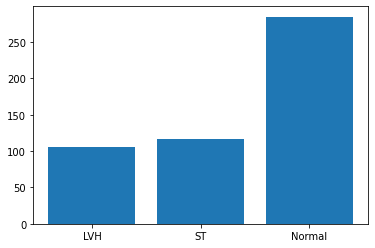

In [11]:
plt.bar(label, count)
plt.show()

In [12]:
angina = df[df['HeartDisease']==1]
angina_true = angina[angina['ExerciseAngina']=='Y']
angina_false = angina[angina['ExerciseAngina']=='N']
label = ['True', 'False']
count = [len(angina_true), len(angina_false)]

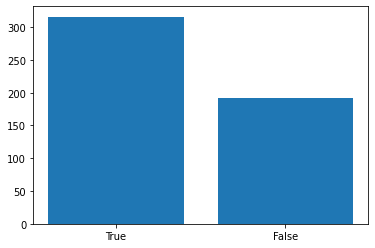

In [13]:
plt.bar(label, count)
plt.show()

In [14]:
df['ST_Slope'] = df['ST_Slope'].replace(['Up', 'Flat', 'Down'], [0,1,2])

df['ExerciseAngina'] = df['ExerciseAngina'].replace(['N', 'Y'], [0,1])

df['RestingECG'] = df['RestingECG'].replace(['LVH', 'Normal', 'ST'], [0,1,2])

df['ChestPainType'] = df['ChestPainType'].replace(['ASY', 'ATA', 'NAP', 'TA'], [0,1,2,3])

df['Sex'] = df['Sex'].replace(['M', 'F'], [0,1])

In [15]:
data = df.iloc[:, :10]
target = df.iloc[:, 10]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=1)

In [31]:
model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train,y_train)

y_pred = model_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6630434782608695

In [32]:
svc = SVC(kernel='linear')

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9347826086956522

In [33]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9239130434782609